In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import scipy.fftpack

def smooth_data(data, window):
    return np.convolve(y, np.ones(window)/window, mode='same')

In [14]:
# Importing and cleaning data
df = pd.read_csv("short_term_rates.csv")
df1 = df.iloc[:, [0, 4]]
df1 = df1.iloc[5:, :]
df1["Series Description"] = pd.to_datetime(df1["Series Description"])
df1.iloc[:, 1] = pd.to_numeric(df1.iloc[:, 1], errors="coerce")
df1 = df1.dropna()
df1.iloc[:, 1] = df1.iloc[:, 1].astype('float64')

In [15]:
# Selecting random data points
import random
random.seed(90)
size = 500
padding = 20
start = random.randint(9000, 15756 - size - 2 * padding)
end = start + size + 2 * padding
x = df1.iloc[:, 0].values
y = df1.iloc[:, 1].values

x = x[start: end]
y = y[start:end]

(array([12692., 12784., 12874., 12965., 13057., 13149., 13239., 13330.,
        13422., 13514.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

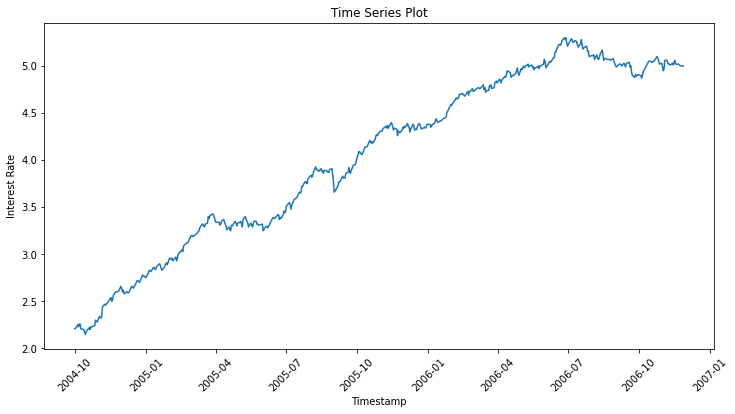

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label="Time Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Interest Rate")
plt.title("Time Series Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [17]:
# Smooting random data points
smooth_y = smooth_data(y,padding)
smooth_y = smooth_y[padding:-1 * padding]
x = x[padding:-1 * padding]
y = y[padding:-1 * padding]

(array([12692., 12784., 12874., 12965., 13057., 13149., 13239., 13330.,
        13422.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

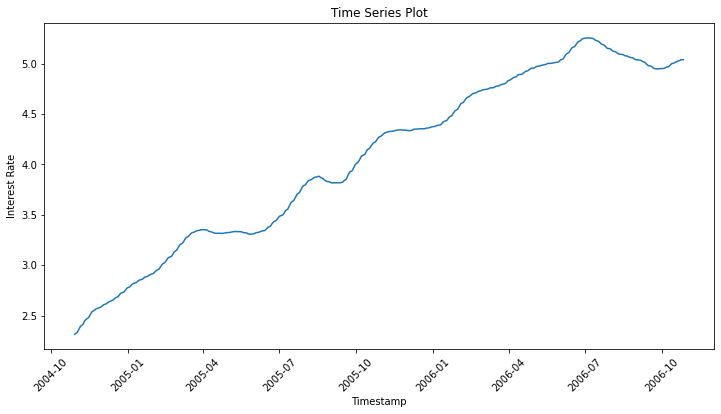

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(x, smooth_y, label="Time Series Data")
plt.xlabel("Timestamp")
plt.ylabel("Interest Rate")
plt.title("Time Series Plot")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [19]:
def time_diff(x1, x2):
    diff = x2 - x1
    diff = diff / np.timedelta64(1, 'D')
    return diff

total_days_diff = time_diff(x[0], x[len(x) - 1])
dt = 1 / total_days_diff
deltaT = (np.diff(x) / np.timedelta64(1, 'D')) * dt
deltaR = np.diff(smooth_y)
R = smooth_y[: -1]
Rdt = R * deltaT

In [20]:
# Find a, b without sigma and dW
A = np.column_stack([deltaT, Rdt])
AT = A.T

AT_A = AT @ A
AT_A = AT_A.astype(float)
inverse_AT_A = np.linalg.inv(AT_A)
p = (inverse_AT_A @ AT)
parameters = p @ deltaR
parameters

array([ 6.56620478, -1.10862595])

In [21]:
# Finding a, b, Sigma By performing mulitple regressions
def find_absigma(trials):
    param_matrix = []
    for i in range(trials):
        dW = np.random.normal(0, 1, size - 1)
        A = np.column_stack([deltaT, Rdt, dW])
        AT = A.T
        AT_A = AT @ A
        AT_A = AT_A.astype(float)
        inverse_AT_A = np.linalg.inv(AT_A)
        p = (inverse_AT_A @ AT)
        parameters = p @ deltaR
        param_matrix.append(parameters)
    return np.sum(param_matrix, axis=0)/trials


In [22]:
total_days_diff = time_diff(x[0], x[len(x) - 1])
dt = 1 / total_days_diff
deltaT = (np.diff(x) / np.timedelta64(1, 'D')) * dt
deltaR = np.diff(y)
R = y[: -1]
Rdt = R * deltaT

params = find_absigma(100)
params

array([ 1.15494638e+01, -1.62932728e+00,  1.15531140e-04])